## Encoder
Converts an input sequence of tokens into a sequence of embedding vectors, often called the hidden state or context

## Decoder
Uses the encoder’s hidden state to iteratively generate an output sequence of tokens, one token at a time

<h3>Encoder-decoder architecture of the transformer</h3>

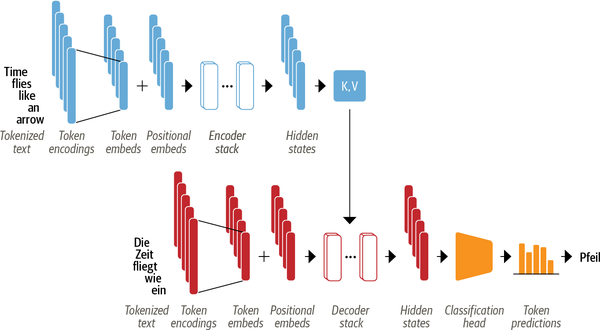


Tokenization involves splitting the sentence into individual tokens (words or subwords)

Each token is represented as a one-hot vector, which is a binary vector with a dimension equal to the size of the tokenizer's vocabulary.

Token embeddings transform one-hot vectors into continuous, lower-dimensional vectors (embeddings) that capture the semantic meaning of each token

Since the attention mechanism is not aware of the relative positions of the tokens, we need a way to inject some information about token positions into the input to model the sequential nature of text. The token embeddings are thus combined with positional embeddings that contain positional information for each token.

The encoder’s output is fed to each decoder layer, and the decoder then generates a prediction for the most probable next token in the sequence. The output of this step is then fed back into the decoder to generate the next token, and so on until a special end-of-sequence (EOS) token is reached

## Transformer architecture

### Encoder Only
These models convert an input sequence of text into a rich numerical representation that is well suited for tasks like text classification or named entity recognition.

BERT and its variants, like RoBERTa and DistilBERT

The representation computed for a given token in this architecture depends both on the left (before the token) and the right (after the token) contexts.

This is often called bidirectional attention.

### Decoder Only
These models will auto-complete the sequence by iteratively predicting the most probable next word

The family of GPT models belong to this class.

The representation computed for a given token in this architecture depends only on the left context.
 
This is often called causal or autoregressive attention.

### Encoder-Decoder
These are used for modeling complex mappings from one sequence of text to another; they’re suitable for machine translation and summarization tasks. 

The BART and T5 models belong to this class.


# Encoder

The main role of the encoder stack is to “update” the input embeddings to produce representations that encode some contextual information in the sequence. For example, the word “apple” will be updated to be more “company-like” and less “fruit-like” if the words “keynote” or “phone” are close to it.

Each encoder layer receives a sequence of embeddings and feeds them through the following sublayers:

A multi-head self-attention layer

A fully connected feed-forward layer that is applied to each input embedding

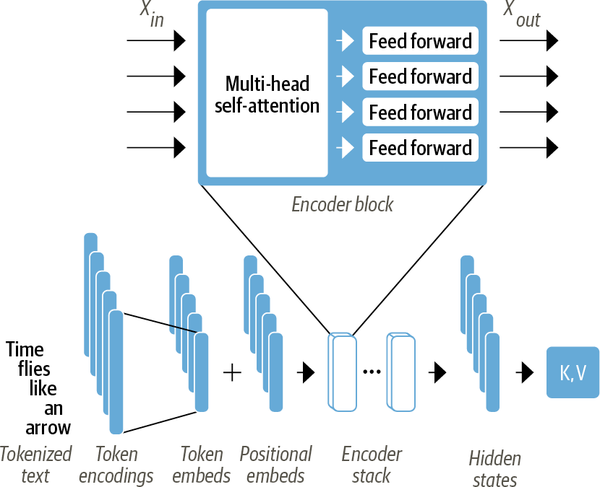

The output embeddings of each encoder layer have the same size as the inputs





### Self Attention

Attention is a mechanism that allows neural networks to assign a different amount of weight or “attention” to each element in a sequence

The “self” part of self-attention refers to the fact that these weights are computed for all hidden states in the same set—for example, all the hidden states of the encoder

The self-attention mechanism allows for parallelization and capturing complex relationships within the input sequence.

The main idea behind self-attention is that instead of using a fixed embedding for each token, we can use the whole sequence to compute a weighted average of each embedding. 

Another way to formulate this is to say that given a sequence of token embeddings x1,x2,....xn. 
Self-attention produces a sequence of new embeddings x1'+x2'+...xn'
where each xi' is a linear combination of all the xj.

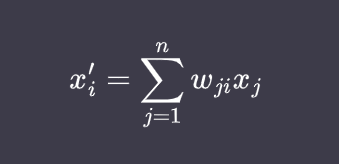
    
The coefficients Wji are called attention weights and are normalized so that
 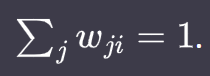 






Example

Given the sentence “time flies like an arrow”, “flies” here refers to the verb instead of insects .We can create a representation for “flies” that incorporates this context by combining all the token embeddings in different proportions, perhaps by assigning a larger weight to the token embeddings for “time” and “arrow”.

Hence averaging the token embeddings might be a good idea

Embeddings that are generated in this way are called contextualized embeddings 

### Implementing a self-attention layer

#### Scaled dot-product attention

    Project each token embedding into three vectors called query, key, and value.

    Compute attention scores - We determine how much the query and key vectors relate to each other using a similarity function (A dot product, computed efficiently using matrix multiplication of the embeddings). Queries and keys that are similar will have a large dot product, while those that don’t share much in common will have little to no overlap. The outputs from this step are called the attention scores, and for a sequence with n input tokens there is a corresponding n X n matrix of attention scores.
    
    Compute attention weights - The attention scores are first multiplied by a scaling factor to normalize their variance and then normalized with a softmax to ensure all the column values sum to 1. The resulting n × n matrix now contains all the attention weights, Wij
    
    Update the token embeddings - Multiply the attention weights by the value vector v1,v2,....vn to obtain an updated representation for embedding 
 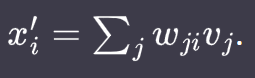 


In [1]:
!pip install bertviz
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

#In BERT each token is represented as a 768-dimensional vector
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)
text = "time flies like an arrow"
show(model, "bert", tokenizer, text, display_mode="light", layer=0, head=8)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 4.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 68.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.17
    Uninstalling botocore-1.31.17:
      Successfully uninstalled botocore-1.31.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.4 requires botocore<1.31.18,>=1.31.17, but you have botocore 1.29.165 which is incompatible.


100%|██████████| 440473133/440473133 [00:06<00:00, 67306515.03B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 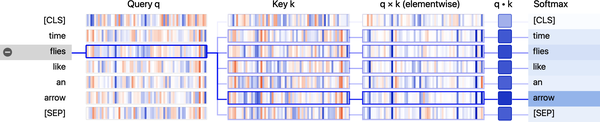 

In [2]:
#tokenize the text
inputs = tokenizer(text, return_tensors="pt", add_special_tokens=False)
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

##### Dense Embeddings
Dense in this context means that each entry in the embeddings contains a nonzero value. It refers to distributed representations of words or tokens in continuous vector spaces.

These embeddings are dense in the sense that each word or token is represented by a high-dimensional vector (e.g., 100, 200, or 300 dimensions), and every dimension in the vector has a real numerical value 

It provide richer and continuous representations for words that capture semantic relationships between them, which can lead to better generalization, understanding of word relationships, and performance 

In contrast to sparse representations, where each word or token is represented using a one-hot encoded vector in which a single element is 1 (indicating the word's presence) while all other elements are 0 (indicating the absence of other words). This representation is highly dimensional, with the length of the vector equal to the size of the vocabulary. For a large vocabulary, this results in very high-dimensional sparse vectors, which are inefficient and challenging to work with in deep learning models.

The most commonly known dense word embeddings are Word2Vec, GloVe

In [3]:
#create some dense embeddings
from torch import nn
from transformers import AutoConfig

config = AutoConfig.from_pretrained(model_ckpt)
token_emb = nn.Embedding(config.vocab_size, config.hidden_size)
token_emb

Embedding(30522, 768)

In [4]:
inputs_embeds = token_emb(inputs.input_ids)
inputs_embeds.size() #[batch_size, seq_len, hidden_dim]

torch.Size([1, 5, 768])

The token embeddings at this point are independent of their context, This means that homonyms (words that have the same spelling but different meaning), like  “flies”, have the same representation

In [8]:
inputs_embeds

tensor([[[-0.1121, -0.0867,  0.0880,  ...,  0.7467, -0.5484,  0.5100],
         [ 2.3419,  1.0703,  0.8782,  ...,  1.1885, -1.7719, -1.2477],
         [-0.3824, -0.0422,  0.1565,  ...,  0.9097,  0.5753, -1.9422],
         [-0.8823,  0.0625, -1.3135,  ...,  0.0883, -0.3338, -1.7377],
         [ 0.1006, -0.6584,  2.5056,  ...,  0.5382, -0.5305,  0.3569]]],
       grad_fn=<EmbeddingBackward0>)

In [12]:
# create the query, key, and value vectors and calculate the attention scores 
import torch
from math import sqrt

query = key = value = inputs_embeds
dim_k = key.size(-1) # 768
#performs a batch matrix-matrix product 
scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k)
scores.size()

torch.Size([1, 5, 5])

In [23]:
# torch.bmm(), which takes two batches of matrices and multiplies each
# matrix from the first batch with the corresponding matrix in the second batch.
import torch

# Define the matrices for batch 1
batch1_matrix1 = torch.tensor([[1, 2], [3, 4]])
batch1_matrix2 = torch.tensor([[5, 6], [7, 8]])
batch1_matrix3 = torch.tensor([[9, 10], [11, 12]])

# Define the matrices for batch 2
batch2_matrix1 = torch.tensor([[2, 1], [4, 3]])
batch2_matrix2 = torch.tensor([[6, 5], [8, 7]])
batch2_matrix3 = torch.tensor([[10, 9], [12, 11]])

# Create batches of matrices
batch1 = torch.stack([batch1_matrix1, batch1_matrix2, batch1_matrix3])
batch2 = torch.stack([batch2_matrix1, batch2_matrix2, batch2_matrix3])

print(batch1)
print(batch2)

# Use torch.bmm() to multiply the batches of matrices
result = torch.bmm(batch1, batch2.transpose(1, 2))

print(result)
print(result.size())


tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])
tensor([[[ 2,  1],
         [ 4,  3]],

        [[ 6,  5],
         [ 8,  7]],

        [[10,  9],
         [12, 11]]])
tensor([[[  4,  10],
         [ 10,  24]],

        [[ 60,  82],
         [ 82, 112]],

        [[180, 218],
         [218, 264]]])
torch.Size([3, 2, 2])


In [24]:
# apply the softmax now
import torch.nn.functional as F

weights = F.softmax(scores, dim=-1)
weights.sum(dim=-1)

tensor([[1., 1., 1., 1., 1.]], grad_fn=<SumBackward1>)

In [26]:
# multiply the attention weights by the values
attn_outputs = torch.bmm(weights, value)
attn_outputs.shape

torch.Size([1, 5, 768])

In [27]:
# Make all the above steps into a function
def scaled_dot_product_attention(query, key, value):
    dim_k = query.size(-1)
    scores = torch.bmm(query, key.transpose(1, 2)) / sqrt(dim_k)
    weights = F.softmax(scores, dim=-1)
    return torch.bmm(weights, value)

### Multi-headed attention

Create a different set of vectors for the query, key, and value of a token by using three different linear projections to project our initial token vector into three different spaces.

These transformations project the embeddings and each projection carries its own set of learnable parameters, which allows the self-attention layer to focus on different semantic aspects of the sequence.

The softmax of one head tends to focus on mostly one aspect of similarity. Having several heads allows the model to focus on several aspects at once. For instance, one head can focus on subject-verb interaction, whereas another finds nearby adjectives.

This resemblances the filters in convolutional neural networks, where one filter can be responsible for detecting faces and another one finds wheels of cars in images.

In [28]:
class AttentionHead(nn.Module):
    def __init__(self, embed_dim, head_dim):
        super().__init__()
        self.q = nn.Linear(embed_dim, head_dim)
        self.k = nn.Linear(embed_dim, head_dim)
        self.v = nn.Linear(embed_dim, head_dim)

    def forward(self, hidden_state):
        attn_outputs = scaled_dot_product_attention(
            self.q(hidden_state), self.k(hidden_state), self.v(hidden_state))
        return attn_outputs

In [29]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        embed_dim = config.hidden_size
        num_heads = config.num_attention_heads
        head_dim = embed_dim // num_heads
        self.heads = nn.ModuleList(
            [AttentionHead(embed_dim, head_dim) for _ in range(num_heads)]
        )
        self.output_linear = nn.Linear(embed_dim, embed_dim)

    def forward(self, hidden_state):
        x = torch.cat([h(hidden_state) for h in self.heads], dim=-1)
        x = self.output_linear(x)
        return x

In [30]:
multihead_attn = MultiHeadAttention(config)
attn_output = multihead_attn(inputs_embeds)
attn_output.size()

torch.Size([1, 5, 768])

In [31]:
from bertviz import head_view
from transformers import AutoModel

model = AutoModel.from_pretrained(model_ckpt, output_attentions=True)

sentence_a = "time flies like an arrow"
sentence_b = "fruit flies like a banana"

viz_inputs = tokenizer(sentence_a, sentence_b, return_tensors='pt')
attention = model(**viz_inputs).attentions
sentence_b_start = (viz_inputs.token_type_ids == 0).sum(dim=1)
tokens = tokenizer.convert_ids_to_tokens(viz_inputs.input_ids[0])

head_view(attention, tokens, sentence_b_start, heads=[8])

<IPython.core.display.Javascript object>